Grade=100/100

Lab 4: Final Report
Daniel Harris

Abstract:
The CCD, or charge collecting device, is the main tool used for collecting photons in observational astronomy. In this lab, the typical callibrations done before any observation (biases and flats) were completed and analyzed in order to characterize the CCD. Obtaining biases and flats allowed many of the properties of the CCD to be investigated, such as the gain and readnoise. Other properties of the CCD, such as its linearity and dark current as a function of temperature, were also investigated. The dark current as a function of temperature was then used in an attempt to measure the CCD's value of A (a constant) and Eg (the energy gap). Although many CCDs are assigned callibration values, these values may not always be accurate and thus such values should be re-measured by the experimenter before each observation. Thus, this lab served as a simulation of a typical pre-observation procedure. 

Introduction:

A charge coupling device works by utilizing the photoelectric effect to detect photons that hit a silicon surface. This detection measures all photons (with enough energy to cause the photoelectric effect) that hit the surface, and therefore a CCD cannot differentiate between photons of different wavelengths. When a photon collides with a Si atom, its energy can be absorbed by the atom and-- if it has a high enough energy-- it can be used to ionize the atom. These ionized electrons are then circulated throughout the CCD in an organized manner and measured as current. This current detection is done through an elaborate "electron-collecting process" in which the original position of each electron is not lost. Therefore, the number of photons striking each pixel (a small area of the CCD in which all of the ionized electrons within it are collected together) can be deduced from the current measurements, and an image of light intensity by location can be determined.

Before every experiment, calibration procedures must be done on the CCD. Because astronomical images often involve very small numbers of photons, such callibration data are especially important to ensure an accurate image. Often light from other sources in the observatory, brighter and closer objects, or other sources can outweigh light input from the object being observed, and thus all of this "noise" must be removed in a controlled, systematic manner.

A bias image involves exposing the CCD to no light for 0 seconds and obtaining an image. This image gives the experimenter the "zero noise level of the CCD," and this "zero noise level" can be subtracted off from obtained science images. These should be taken in the absence of light so that only results due to the "zero noise level" will be obtained instead of results due to photons.

A flat image uses a uniform light source in an attempt to cause the same number of photons to strike each pixel. In theory, this would produce an image that is completely uniform across all pixels, since the same number of photons would strike each pixel and cause the same number of electrons to be ejected. However, some pixels may be more sensitive than others or other small, light-absorbing objects (such as particles of dust) may be blocking some of the pixels, and thus could cause variations in response. This varied response can be detected by examining variations in response to the uniform light source: the image produced is called a flat field. To correct for this, any science images obtained can be divided by the flat field.

Dark current is a phenomenon in which current is produced in the absence of photons. This occurs simply due to the thermal energy of the atoms, which can cause ionization if the temperature is warm enough. Because this would make it appear as if photons have struck the CCD when none actually have, dark current can interfere with the accuracy of the image. Therefore, the CCD should be kept as cold as possible. Dark current can be measured by taking dark images, which are images at a certain exposure time in the absence of light. Presumably, any current detected must be due to electrons that have been ionized because they had enough thermal energy. Measuring the dark current as a function of temperature can give the experimenter the A constant and the Eg (energy gap) of the CCD, according to the equation Dark current = [AT^(3/2)]exp(-Eg/2kT).

When exposed to a constant light source, the CCD should produce a linear response function, as the rate of photons hitting the CCD is constant. However, this only occurs up to a certain point (until the CCD becomes saturated), after which the response function will begin to flatten out. It is important to know the time range for a CCD's linear response function because taking observations for a longer time range than this will not yield an accurate science image.

The gain and readnoise of the CCD can be calculated from bias and flat data. The gain of a CCD is the conversion factor between ADU (the units in which the photon counts per pixel are given) and number of electrons. The gain can be calculated according to the equation 
Gain = [(F1+F2)-(B1+B2)]/(var(f1-f2)-var(b1-b2)], where F1 is the mean value of the first flat image, B1 is the mean value of the first image, and var (f1-f2) is the variance of the first flat image minus the second flat image, etc. The readnoise can then be calculated using the equation Read Noise = [Gain*var(b1-b2)]/(sqrt2).

Gain = 2.776743
ReadNoise  = 17.113151


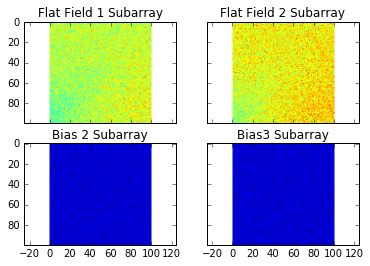

In [1]:
#Caluclating the gain and readnoise using the entire flat/bias images:


#Note: flat field 2, flat field 3, bias 2, and bias 3 were used to 
#calculate gain and read noise

import scipy as scp
import numpy as np
import math
import matplotlib as mp
import sys
import matplotlib.pyplot as plt
%matplotlib inline


from astropy.io import fits

#importing the data

#Note: all data used in this lab for all parts was downloaded and saved 
#onto the desktop of the Angell hall computers in a folder labeled 
#"lab_4_data." Thus, if the code is run again, all of the data will be 
#lost, since the path will no longer function properly.

FlatField2 = fits.getdata('/Users/djharr/desktop/lab_4_data/StarTeam1.00000002.FlatField.fit')
FlatField2 = np.float64(FlatField2)

FlatField3 = fits.getdata('/Users/djharr/desktop/lab_4_data/StarTeam1.00000003.FlatField.fit')
FlatField3 = np.float64(FlatField3)

Bias2 = fits.getdata('/Users/djharr/desktop/lab_4_data/StarTeam1.00000002.Bias.fit')
Bias2 = np.float64(Bias2)

Bias3 = fits.getdata('/Users/djharr/desktop/lab_4_data/StarTeam1.00000003.Bias.fit')
Bias3 = np.float64(Bias3)


#Determining the denominator values for the Gain equation

#Determining var(F2-F3)
DiffFF = np.subtract (FlatField2, FlatField3) 
vFF = np.var(DiffFF)

#Determining var(B2-B3)
DiffBias = np.subtract (Bias2, Bias3)
vBias = np.var(DiffBias)


#Determining the numerator values for the Gain equation

#Determining mean(F2)+mean(F3) and mean(B2)+mean(B3)
meanFF2 = np.mean(FlatField2)
meanFF3 = np.mean(FlatField3)
meanB2 = np.mean(Bias2)
meanB3 = np.mean(Bias3)
SumMeanFF = np.add(meanFF2, meanFF3)
SumMeanBias = np.add(meanB2, meanB3)



#Calculating the gain
Gain = ((SumMeanFF - SumMeanBias)/(vFF - vBias))
print 'Gain = %f' %Gain


#Calculating the read noise

DiffBias = np.subtract(Bias2, Bias3)

ReadNoise = (Gain*(np.std(DiffBias)))/(np.sqrt(2))
print 'ReadNoise  = %f' %ReadNoise



#Creating images of the bias and flat images:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.imshow(FlatField2, vmin=32000, vmax=34000)
ax1.set_title('Flat Field 1')
ax2.imshow(FlatField3, vmin=32000, vmax=34000)
ax2.set_title('Flat Field 2')
ax3.imshow(Bias2, vmin=1000, vmax=1300)
ax3.set_title('Bias 2')
ax4.imshow(Bias3, vmin=1000, vmax=1300)
ax4.set_title('Bias3')

#Note: upon examining the images produced, there is a large amount of 
#variation in ADU counts by location for the flat images. 
#This large variation could
#yield unrepresentative mean and variance values, and thus introduce
#error into the calculated read noise and gain values. In an attempt to 
#minimize such error, a smaller section of the each flat field image was
#obtained using a sub array. As is evident from the images 
#(and histograms below), these 
#sub-images are much more uniform and will most likely yield more accurate
#mean and variancevalues. 
#In order to keep consistency, a subimage was generated for the
#bias images as well using the same coordinates.

#Making a subarray of all of the FlatField and Bias Images
FlatField2Sub = FlatField2[700:800, 500:600]
FlatField3Sub = FlatField3[700:800, 500:600]
Bias2Sub = Bias2[700:800, 500:600]
Bias3Sub = Bias3[700:800, 500:600]

#Generating image representations of the sub-images
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.imshow(FlatField2Sub, vmin=32000, vmax=34000)
ax1.set_title('Flat Field 1 Subarray')
ax2.imshow(FlatField3Sub, vmin=32000, vmax=34000)
ax2.set_title('Flat Field 2 Subarray')
ax3.imshow(Bias2Sub, vmin=1000, vmax=1300)
ax3.set_title('Bias 2 Subarray')
ax4.imshow(Bias3Sub, vmin=1000, vmax=1300)
ax4.set_title('Bias3 Subarray')










In [2]:
#As discussed in the section above, there is a significant amount of 
#variation in the flat field images. This variation can be displayed
#using histograms of the number of pixels corresponding to each
#ADU value.

FlattenFF2 = FlatField2.flatten() #This makes the array into one single
#row so that the histogram can be easily made.

#Creating a histogram of Flat Filed 2
plt.hist(FlattenFF2, bins=1000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Flat Field 2 ADU Pixel Distribution')
plt.xlim(29950,34000)

#As is evident from the histogram below, the output values are not at all
#Gaussian, thus illustrating that using the entire flat field image may
#not yield representative mean and variance values and could introduce 
#some error into the calculated gain and read noise values.



(29950, 34000)

(29950, 34000)

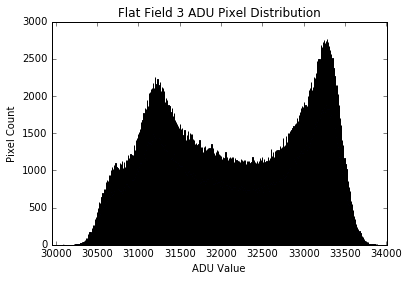

In [3]:
#Generating a histogram for flat field 3:

FlattenFF3 = FlatField3.flatten()


plt.hist(FlattenFF3, bins=10000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Flat Field 3 ADU Pixel Distribution')
plt.xlim(29950,34000)

#This output is also not at all Gaussian.

(990, 1060)

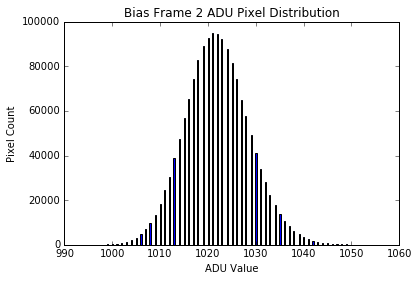

In [4]:
#Generating a histogram for Bias 2:

FlattenBias2 = Bias2.flatten()
plt.hist(FlattenBias2, bins=10000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Bias Frame 2 ADU Pixel Distribution')
plt.xlim(990,1060)

#This output is Gaussian.

(990, 1060)

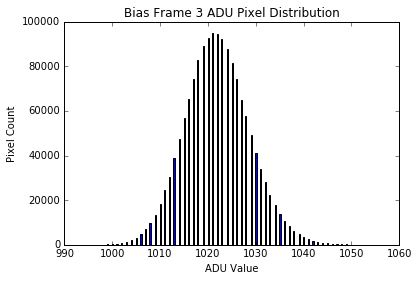

In [5]:
#Generating a histogram for Bias 3:

FlattenBias3 = Bias3.flatten()
plt.hist(FlattenBias2, bins=10000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Bias Frame 3 ADU Pixel Distribution')
plt.xlim(990,1060)

#This output is Gaussian.

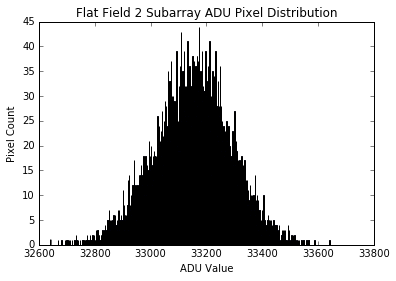

In [6]:
#Because the outputs for the flat fields were not at all Gaussian,
#sub-images were created. Histograms for these sub-images were created
#to see if the sub-images were Gaussian and thus yield representative
#mean and variance values.

FlattenFlatField2Sub = FlatField2Sub.flatten()
plt.hist(FlattenFlatField2Sub, bins=1000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Flat Field 2 Subarray ADU Pixel Distribution')

#The output for this sub-array is significantly more Gaussian, and thus
#most likely would yield a representative mean and variance for 
#gain and readnoise calculations.

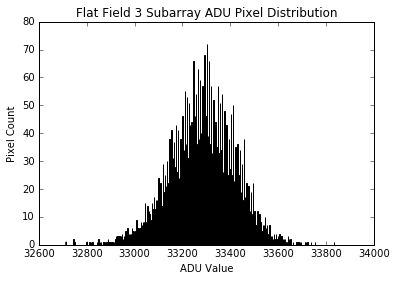

In [7]:
#Generating a histogram for the sub-array of flat field 3:

FlattenFlatField3Sub = FlatField3Sub.flatten()
plt.hist(FlattenFlatField3Sub, bins=1000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Flat Field 3 Subarray ADU Pixel Distribution')

#This output is also significantly more Gaussian.

In [8]:
#Generating a histogram for bias field 2 subarray:

FlattenBias2Sub = Bias2Sub.flatten()
plt.hist(FlattenBias2Sub, bins=10000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Bias Frame 2 Subarray ADU Pixel Distribution')
plt.xlim(990,1060)

#Although the results of both bias frames were Gaussian and thus likely
#yielded representative mean and variance values, subarrays of the same
#coordinates were also used for the bias frames for consistency. The
#ADU value distribution for the subarrays was plotted again to make sure
#the sub arrays are still Gaussian, and the output shows that both are.

(990, 1060)

(990, 1060)

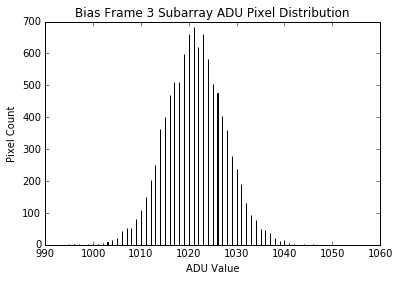

In [9]:
#Generating a histogram for the subarray of bias 3:

FlattenBias3Sub = Bias3Sub.flatten()
plt.hist(FlattenBias3Sub, bins=10000)
plt.xlabel('ADU Value')
plt.ylabel('Pixel Count')
plt.title('Bias Frame 3 Subarray ADU Pixel Distribution')
plt.xlim(990,1060)

In [10]:
#Calculating the gain and read noise using the subarrays:

#Determining the denominator values for the Gain equation
DiffFFSub = np.subtract (FlatField2Sub, FlatField3Sub)
vFFSub = np.var(DiffFFSub)

DiffBiasSub = np.subtract (Bias2Sub, Bias3Sub)
vBiasSub = np.var(DiffBiasSub)



#Determining the numerator values for the Gain equation
meanFF2Sub = np.mean(FlatField2Sub)
meanFF3Sub = np.mean(FlatField3Sub)
meanB2Sub = np.mean(Bias2Sub)
meanB3Sub = np.mean(Bias3Sub)

SumMeanFFSub = np.add(meanFF2Sub, meanFF3Sub)
SumMeanBiasSub = np.add(meanB2Sub, meanB3Sub)



#Calculating the gain
Gain2 = ((SumMeanFFSub - SumMeanBiasSub)/(vFFSub - vBiasSub))
print 'Gain2 = %f' %Gain2


#Calculating the read noise

DiffBiasSub = np.subtract(Bias2Sub, Bias3Sub)

ReadNoise2 = (Gain2*(np.std(DiffBiasSub)))/(np.sqrt(2))
print 'ReadNoise 2  = %f' %ReadNoise2

#These gain and read noise values are not very different than the values
#caluclated above. However, because astronomical data often involves very
#small numbers of photons, it is imperative that the gain and readnoise
#values be as accurate as possible, and thus such corrected calculations
#are necessary.

Gain2 = 2.777598
ReadNoise 2  = 17.305458


[  5763.58228502   8134.93897924  15263.07632769  22415.64701974
  29546.59124952  38910.47753108  43507.81853774  47295.36792003
  50512.87329104  53376.80153723  56043.3981443   58363.45418365
  59309.44044598]
[  1.    1.5   3.    4.5   6.    8.    9.   10.   11.   12.   13.   14.
  15. ]


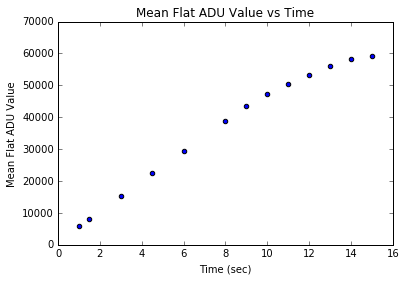

In [76]:
#Linearity:

#Using a loop to import the data:

filerootlin = '/Users/djharr/desktop/lab_4_data/lin.0000000'
fileendlin = '.FlatField.fit'

lin_array = np.zeros(14)
for i in range (1,14):
    filenamelin = filerootlin + str(i) + fileend
    lin_file = fits.getdata(filenamelin)
    lin_mean = np.mean(lin_file)
    lin_array[i] = lin_mean 
    
lin_array = np.delete(lin_array,0) #To delete the "0" value from the array
print lin_array

lintimes = np.array([1, 1.5, 3, 4.5, 6, 8, 9, 10, 11, 12, 13, 14, 15])
#These are the times that we took measurements at (in seconds)
print lintimes


plt.scatter(lintimes, lin_array)
plt.xlabel('Time (sec)')
plt.ylabel('Mean Flat ADU Value')
plt.title('Mean Flat ADU Value vs Time')

#From the graph below, it appears that the CCD starts to deviate from
#linearity at an exposure time of 11 seconds.

        


In [83]:
#Dark current and curve fitting to determine the values of A and Eg:


#Using a loop to import the data:
filerootdc = '/Users/djharr/desktop/lab_4_data/dark.0000000'
fileenddc = '.Dark.fit'

dc_array = np.zeros(21)
for i in range (1,21):
    filenamedc = filerootdc + str(i) + fileenddc
    dc_file = fits.getdata(filenamedc)
    dc_mean = np.mean(dc_file)
    dc_array[i] = dc_mean

dc_array = np.delete(dc_array,0)

#In order to obtain accurate values of A and Eg, the bias frames must be
#subtracted off of the dark images obtained. The most accurate way to do 
#this is to determine a mean value for all 8 of the bias images taken 
#above, and to subtract this mean bias value from the mean value of each
#dark image. 

#Importing the bias images using a loop:
filerootbias = '/Users/djharr/desktop/lab_4_data/StarTeam1.0000000'
fileendbias = '.Bias.fit'

bias_array = np.zeros(8)
for i in range (1,8):
    filenamebias = filerootbias + str(i) + fileendbias
    bias_file = fits.getdata(filenamebias)
    bias_mean = np.mean(bias_file)
    bias_array[i] = bias_mean
    
print bias_array
bias_array = np.delete(bias_array, 0) #to remove the "0" value in the array
bias_averages = np.mean(bias_array)
print 'Bias Average  = %f' %bias_averages

    
temps_celsius = np.array([-10, -8.5, -2.3, 1.9, 5.3, 8.4, 10.8, 12.6, 14.5, 15.9, 16.9, 18.5, 19.0, 20.0, 20.6, 21.1, 21.7, 22.2, 22.8, 23.3])
#These are the various temperature values that each of the dark
#images were taken at
temps_kelvin = temps_celsius + np.repeat(273, 20)
print temps_kelvin

dc_array1 = dc_array - bias_averages
print dc_array1


#Creating a graph of the data
plt.scatter(temps_kelvin, dc_array1)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Mean ADU Value')
plt.title('Mean Bias ADU Value vs Temperature')

[    0.          1022.24861912  1021.92108932  1021.99688069  1021.86034282
  1022.22310586  1021.4428976   1021.30080226]
Bias Average  = 1021.856248
[ 263.   264.5  270.7  274.9  278.3  281.4  283.8  285.6  287.5  288.9
  289.9  291.5  292.   293.   293.6  294.1  294.7  295.2  295.8  296.3]
[  3.30718506   2.83882097   1.50199923   0.19060554  -0.47893823
  -0.33562092   0.45067987   1.74273677   4.48354928   7.56160643
  10.70440728  14.2037806   17.88439126  21.60605985  25.47918621
  29.01691016  32.55284442  35.86315904  39.2907228   42.19424773]


In [188]:
#Curve Fit:

#Defining the function used to represent the dark current with respect
#to temperature:
def func (T, A, E, c):
    return (A*T**1.5)*(np.exp(-E/(2*0.00008617*T))) + c


In [189]:
#Original guesses for the various parameters of the equation:

A = 25000000
E = 1.11
c = -3
y = func(temps_kelvin, A, E, c)
print y

[ -0.53288749  -0.14102973   2.17031914   4.61061835   7.3214186
  10.54193416  13.64464042  16.3870595   19.72780054  22.51937364
  24.7025281   28.55481979  29.85589956  32.60694524  34.35742917
  35.87609623  37.77316403  39.4185051   41.47319033  43.25470126]


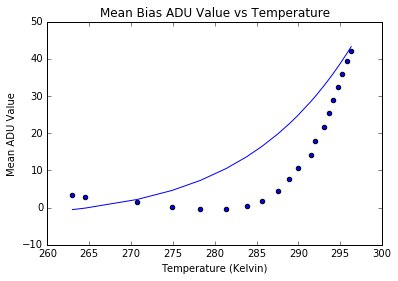

In [190]:
#Creating a graph with the actual values and the preliminary
#guesses for the equation parameters:

plt.scatter(temps_kelvin, dc_array1)
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Mean ADU Value')
plt.title('Mean Bias ADU Value vs Temperature')

plt.plot(temps_kelvin, y)

In [195]:
#Curve Fit: determining the actual parameter values:

from scipy.optimize import curve_fit 

coeffs, filter = curve_fit(func, temps_kelvin, y, p0=(25000000, 1.11, -3))
print ("A=%s, E=%s, c=%s" % (coeffs[0], coeffs[1], coeffs[2]))

#Note: this curve fit code did not run properly. Our group was advised by
#Professor Miller to simply move on and document the fact that the code
#did not run properly, as this had also occurred with other lab groups.
#However, these values yield a curve that is somewhat similar to the 
#plotted values, and could be a decent approximation.


A=25000000.0, E=1.11, c=-3.0


Conclusions:

Because the code for the curve fit code could not be executed, the values for Eg and A cannot be determined. However, our group did learn many things regarding CCDs and calibrating CCDs for measurements.

When flat/bias images are to be used in calculating parameters such as the gain and read noise, it is wise to analyze the distribution of pixel values in order to make sure the mean and variance values will be representative. If they are not, then the experimenter should only use a smaller section of the image that is more even and representative of the entire image.

The CCD only exhibits a linear response function for approximately 10 seconds. Thus, observations should not be taken for longer than 10 seconds using this CCD: a nonlinear response function would result in a misinterpretation of the number of electrons detected (and thus photons hitting the CCD), preventing accurate science images from being obtained.

Additionally, the dark current values can be seen to change exponentially with temperature. At temperatures of approximately 295K (still less than room temperature), the mean ADU value for the dark images can be as much as 40 units greater than the mean bias values because of the presence of a significant amount of dark current. Thus, even at relatively low temperatuers, significant dark current due to thermal energy can be introduced and introduce error into measurements. Thus, CCDs must be kept as cool as possible, and it would be wise for the experimenter to complete dark images to correct for dark current.

